   #### CLICK NA IMAGEM ABAIXO PARA AMPLIAR E CONFERIR AS ETAPAS DO PROJETO, MUITO INTERESSANTE!
   
![DEMANDA HOR2](https://github.com/user-attachments/assets/d19c852f-056c-4f07-9e44-d2907274031b)



## Análise de Classificação de Churn de clientes da empresa Telco Comunicações.

A rotatividade de clientes no setor de telecomunicações, ou perda de clientes para concorrentes, é um problema crítico. 
Prever isso com antecedência permite implementar estratégias de retenção, e uma redução de 1% na rotatividade pode aumentar significativamente os lucros.

## Objetivo Pessoal
Esse projeto me proporciona experiência prática em ciência de dados, incluindo a manipulação de grandes volumes de dados, aplicação de técnicas de aprendizado de máquina, e implementação de estratégias de retenção de clientes, preparando-me para atuar em diversos setores e segmentos de negócios.

## O Problema

O problema a ser solucionado é identificar clientes propensos a sair e tomar ações preventivas antes que eles partam. 
	
Quando um cliente cancela o serviço a empresa não perdi somente o lucro que ele ofereci, mais deixa o cliente ir levando consigo a insatisfação e assim propagando para outros possiveis futuros clientes


## Demanda da Análise

A análise de churn envolverá:
 * Analisar as correlações entre os cliente", "um produto ou serviço" e "a probabilidade de abandono";

 * Realizar análise de dados e engenharia de recursos;

 * Desenvolver um modelo de aprendizado de máquina para prever quais clientes deixarão a empresa.

## Abaixo, a estrutura padrão das pastas de tOdo o projeto
------------

    ├── LICENSE
    ├── Makefile           <- Makefile with commands like `make data` or `make train`
    ├── README.md          <- The top-level README for developers using this project.
    ├── data
    │   ├── external       <- Data from third party sources.
    │   ├── interim        <- Intermediate data that has been transformed.
    │   ├── processed      <- The final, canonical data sets for modeling.
    │   └── raw            <- The original, immutable data dump.
    │
    ├── docs               <- A default Sphinx project; see sphinx-doc.org for details
    │
    ├── models             <- Trained and serialized models, model predictions, or model summaries
    │
    ├── notebooks          <- Jupyter notebooks. Naming convention is a number (for ordering),
    │                         the creator's initials, and a short `-` delimited description, e.g.
    │                         `1.0-jqp-initial-data-exploration`.
    │
    ├── references         <- Data dictionaries, manuals, and all other explanatory materials.
    │
    ├── reports            <- Generated analysis as HTML, PDF, LaTeX, etc.
    │   └── figures        <- Generated graphics and figures to be used in reporting
    │
    ├── requirements.txt   <- The requirements file for reproducing the analysis environment, e.g.
    │                         generated with `pip freeze > requirements.txt`
    │
    ├── setup.py           <- makes project pip installable (pip install -e .) so src can be imported
    ├── src                <- Source code for use in this project.
    │   ├── __init__.py    <- Makes src a Python module
    │   │
    │   ├── data           <- Scripts to download or generate data
    │   │   └── make_dataset.py
    │   │
    │   ├── features       <- Scripts to turn raw data into features for modeling
    │   │   └── build_features.py
    │   │
    │   ├── models         <- Scripts to train models and then use trained models to make
    │   │   │                 predictions
    │   │   ├── predict_model.py
    │   │   └── train_model.py
    │   │
    │   └── visualization  <- Scripts to create exploratory and results oriented visualizations
    │       └── visualize.py
    │
    └── tox.ini            <- tox file with settings for running tox; see tox.readthedocs.io


--------

<p><small>Project based on the <a target="_blank" href="https://drivendata.github.io/cookiecutter-data-science/">cookiecutter data science project template</a>. 
 

### O Conjunto de Dados

O conjunto de dados Telco Customer Churn da Kaggle foi utilizado, contendo 21 colunas e 7.043 linhas com informações como customerID, sexo, serviço telefônico e de Internet. Analiso essas colunas para identificar variáveis independentes (X) e dependentes.

* ##### Dicionário dos Dados
	
| Atributo       | Significado                                                                               |
| -------------- | ----------------------------------------------------------------------------------------- |
|customerID      | valor único que identifica o cliente														 |	
|genero          |se o cliente é homem ou mulher                                                             |
|SeniorCitizen   |se o cliente é idoso ou não (1, 0)                                                         |
|Parceiro        |se o cliente tem parceiro ou não (Sim, Não) 												 |
|Dependentes     |se o cliente possui dependentes ou não (Sim, Não)                                          |
|fidelidade      |número de meses que o cliente permaneceu na empresa                                        |
|PhoneService    |se o cliente possui serviço telefônico ou não (Sim, Não)                                   |
|MultipleLines   |se o cliente possui múltiplas linhas ou não (Sim, Não, Não serviço telefônico)             |
|InternetService |provedor de serviços de internet do cliente (DSL, Fibra óptica, Não)                       |
|OnlineSecurity  |se o cliente possui segurança online ou não (Sim, Não, Sem serviço de internet)            |
|OnlineBackup    |se o cliente possui backup online ou não (Sim, Não, Sem serviço de internet)               | 
|DeviceProtection|se o cliente possui proteção de dispositivo ou não (Sim, Não, Sem serviço de internet)     |
|TechSupport     |se o cliente tem suporte técnico ou não (Sim, Não, Sem serviço de internet)                |
|StreamingTV     |se o cliente possui streaming de TV ou não (Sim, Não, Não serviço de internet)             |
|StreamingMovies |se o cliente possui streaming de filmes ou não (Sim, Não, Sem serviço de internet)         |
|Contrato        |tipo de contrato de acordo com a duração (Mês a mês, Um ano, Dois anos)                    |
|PaperlessBilling|faturas emitidas em formato sem papel (Sim, Não)                                           |
|PaymentMethod   |forma de pagamento utilizada pelo cliente                                                  |
|MonthlyCharges  |valor cobrado pelo serviço mensalmente                                                     |  
|TotalCharges    |cobranças cumulativas de serviço durante o período de assinatura (manutenção)              |




-----------------------------------------------------------------------------------------------------

### 0.0 - Imports

In [1]:
# mmanipulação
import pandas as pd
import inflection
import gc
pd.set_option('display.max_columns', None)
#Normaçizaçõe e divisões
from sklearn.model_selection import train_test_split

# matematica e estatistica
import numpy as np
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# visualização
import matplotlib.pyplot as plt
import seaborn as sns

gc.collect()

0

### 0.1 - Help Functions

In [59]:
def show_descriptive_statistical(base_churn_raw1):
    # Central Tendency - mean, median
    ct1 = pd.DataFrame(base_churn_raw1.apply(np.mean)).T
    ct2 = pd.DataFrame(base_churn_raw1.apply(np.median)).T

    # Dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame(base_churn_raw1.apply(np.std)).T
    d2 = pd.DataFrame(base_churn_raw1.apply(min)).T
    d3 = pd.DataFrame(base_churn_raw1.apply(max)).T
    d4 = pd.DataFrame(base_churn_raw1.apply(lambda x: x.max() - x.min())).T
    d5 = pd.DataFrame(base_churn_raw1.apply(lambda x: x.skew())).T
    d6 = pd.DataFrame(base_churn_raw1.apply(lambda x: x.kurtosis())).T

    m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
    m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

# color style
palette = ['#5e9fa3', '#dcd1b4', '#fab87f', '#f87e7b', '#b05574']

def plot_box(x1, x2, x3, df, color):
    
    '''
    função para criar 3 boxplots na mesma linha.
    
    paremtros: x1 -> variavel/coluna 1º posição: series pandas
               x2 -> variavel/coluna 2º poisção: series pandas
               x3 -> variavel/coluna 3º posição: series pandas
               df -> dataset: dataframe pandas
               
    retorno: sem retorno.
    '''
    
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 3, 1)
    sns.boxplot(x=x1, data=df, color=color)
    sns.despine(right=True)
    
    plt.subplot(2, 3, 2)
    sns.boxplot(x=x2, data=df, color=color)
    sns.despine(right=True)
    
    plt.subplot(2, 3, 3)
    sns.boxplot(x=x3, data=df, color=color)
    sns.despine(right=True)

    

def descriptive_statistics_lambda(df):
    """
    Calcula e exibe medidas de tendência central e dispersão para atributos numéricos usando lambda.
    
    Parâmetros:
    df (pd.DataFrame): DataFrame contendo os dados para análise.

    Retorna:
    pd.DataFrame: DataFrame com as medidas calculadas.
    """

    # Selecionando as colunas numéricas
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Criando um DataFrame para armazenar as estatísticas
    stats_df = df[numeric_cols].apply(lambda x: pd.Series({
        'Média': x.mean(),
        'Mediana': x.median(),
        'Desvio Padrão': x.std(),
        'Assimetria (Skewness)': x.skew(),
        'Curtose (Kurtosis)': x.kurtosis(),
        'Min': x.min(),
        'Max': x.max(),
        'Range': x.max() - x.min()
    }))

    # Transpondo o DataFrame para inverter linhas e colunas
    stats_df = stats_df.transpose()

    # Configurando para exibir todos os valores sem truncamento
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    pd.set_option('display.float_format', '{:.2f}'.format)

    # Exibindo as estatísticas como DataFrame formatado
    print("Medidas de Tendência Central e Dispersão (Usando Lambda):\n")
    print(stats_df)

    # Retornando o DataFrame com as estatísticas
    return stats_df

def graf_countplot(df, x, title, ax):
    '''
    Função para gerar gráficos countplot

    :param df: Dataframe
        Nome do dataframe.
    :param x: str
        Nome da coluna do dataframe.
    :param title: str
        Título dado ao gráfico.
    :param ax: Axis
        Eixo, posição que o gráfico irá ocupar.
    '''
    ax = sns.countplot(data=base_churn_raw4, x=x, hue=saida, ax=ax,
                       hue_order=hue_order, palette='Set2')
    for container in ax.containers:
        ax.bar_label(container, size=8)
    ax.set(xlabel='', ylabel='')
    ax.set_title(title, loc='left')
    ax.tick_params(labelsize=9)


def graf_histplot(df, x, title, ax):
    '''
    Função para gerar gráficos histplot

    :param df: Dataframe
        Nome do dataframe.
    :param x: str
        Nome da coluna do dataframe.
    :param title: str
        Título dado ao gráfico.
    :param ax: Axis
        Eixo, posição que o gráfico irá ocupar.
    '''
    ax = sns.histplot(data=base_churn_raw4, x=x, hue=saida, ax=ax,
                      hue_order=hue_order,  palette='Set2', multiple='dodge')
    ax.set(xlabel='', ylabel='')
    ax.set_title(title, loc='left')
    ax.tick_params(labelsize=9)





### 0.2 - Path Definition

In [3]:
HOME_PATH = 'C:/Users/valmi/projeto_churn/'
RAW_DATA_PATH = '/data/raw/'
INTERIM_DATA_PATH = '/data/interim/'
FIGURE_PATH = '/reports/figures/'

### 0.3- Load Data

In [11]:
base_churn_raw = pd.read_csv(HOME_PATH+RAW_DATA_PATH+'WA_Fn-UseC_-Telco-Customer-Churn.csv')
base_churn_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 0.4 - Divisão Train e Test

#### 0.4.1 - Transformação do Tipo da variavel target

In [12]:
base_churn_raw['Churn'] = base_churn_raw['Churn'].apply(lambda x:1 if x== 'Yes' else 0)

#### 0.4.2 - Divisão 

In [13]:
x = base_churn_raw.drop("Churn", axis=1)
y = base_churn_raw["Churn"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

base_churn_train = pd.concat([X_train,y_train], axis=1)
base_churn_teste = pd.concat([X_test,y_test], axis=1)

In [14]:
base_churn_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3738,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,0
3151,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,0
4860,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,0
3867,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,0
3810,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,0


## 1.0 - Data Descripition

In [15]:
""" base_churn_raw1 = base_churn_train.copy()
base_churn_raw1.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_churn_raw1.csv') """
base_churn_raw1 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'base_churn_raw1.csv')

### 1.1 - Data Field's


| Atributo       | Significado                                                                               |
| -------------- | ----------------------------------------------------------------------------------------- |
|customerID      | valor único que identifica o cliente														 |	
|genero          |se o cliente é homem ou mulher                                                             |
|SeniorCitizen   |se o cliente é idoso ou não (1, 0)                                                         |
|Parceiro        |se o cliente tem parceiro ou não (Sim, Não) 												 |
|Dependentes     |se o cliente possui dependentes ou não (Sim, Não)                                          |
|fidelidade      |número de meses que o cliente permaneceu na empresa                                        |
|PhoneService    |se o cliente possui serviço telefônico ou não (Sim, Não)                                   |
|MultipleLines   |se o cliente possui múltiplas linhas ou não (Sim, Não, Não serviço telefônico)             |
|InternetService |provedor de serviços de internet do cliente (DSL, Fibra óptica, Não)                       |
|OnlineSecurity  |se o cliente possui segurança online ou não (Sim, Não, Sem serviço de internet)            |
|OnlineBackup    |se o cliente possui backup online ou não (Sim, Não, Sem serviço de internet)               | 
|DeviceProtection|se o cliente possui proteção de dispositivo ou não (Sim, Não, Sem serviço de internet)     |
|TechSupport     |se o cliente tem suporte técnico ou não (Sim, Não, Sem serviço de internet)                |
|StreamingTV     |se o cliente possui streaming de TV ou não (Sim, Não, Não serviço de internet)             |
|StreamingMovies |se o cliente possui streaming de filmes ou não (Sim, Não, Sem serviço de internet)         |
|Contrato        |tipo de contrato de acordo com a duração (Mês a mês, Um ano, Dois anos)                    |
|PaperlessBilling|faturas emitidas em formato sem papel (Sim, Não)                                           |
|PaymentMethod   |forma de pagamento utilizada pelo cliente                                                  |
|MonthlyCharges  |valor cobrado pelo serviço mensalmente                                                     |  
|TotalCharges    |cobranças cumulativas de serviço durante o período de assinatura (manutenção)              |



### 1.2 - Rename Columns

In [16]:
base_churn_raw1.rename(columns={'gender':'genero', 'SeniorCitizen':'Cli_Idoso','Partner':'Parceiro',
								'tenure':'Fidelidade', 'DeviceProtection':'ProtecaoDispositivo', 'StreamingMovies':'StreamFilmes', 
								'PaperlessBilling':'CobrancaPapel','PaymentMethod':'FormaPagCliente',
								'MonthlyCharges':'VlCobrancaMensal','TotalCharges':'CobrancaCumulativa'}, inplace=True)

### 1.3 - Data Dimensions

In [17]:
num_linhas, num_colunas = base_churn_raw1.shape

print('Numero de linhas', num_linhas)
print('Numero de colunas', num_colunas)


Numero de linhas 5634
Numero de colunas 22


### 1.4 - Data Types

In [18]:
base_churn_raw1.dtypes.to_frame().rename(columns={0: 'Tipo'})

,Tipo
Unnamed: 0,int64
customerID,object
genero,object
Cli_Idoso,int64
Parceiro,object
Dependents,object
Fidelidade,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [19]:
del base_churn_raw1['Unnamed: 0']

#### 1.5 - Charge Types


``CONSIDERAÇÕES``

 - Colunas com Respostas Sim/Não: 
 
 Muitas colunas categóricas podem ter respostas binárias (ex.: Yes/No), que podem ser transformadas em variáveis numéricas (0/1) posteriormente.

 - Colunas com Múltiplas Categorias: 
 
 Colunas com mais de duas categorias (como InternetService) podem exigir uma abordagem de codificação, como One-Hot Encoding.

 - Variaveis com N/A ou faltantes: 
 
Variavel "CobrancaCumulativa", possue N/A ou valores faltantes. Por esse motivo que essa variavel é do tipo OBJECT e só poderá ser modificada para FLOAT após se avaliadas e tratadas

In [20]:
base_churn_raw1['Parceiro'] = base_churn_raw1['Parceiro'].apply(lambda x:1 if x== 'Yes' else 0)
base_churn_raw1['Dependents'] = base_churn_raw1['Dependents'].apply(lambda x:1 if x== 'Yes' else 0)
base_churn_raw1['PhoneService'] = base_churn_raw1['PhoneService'].apply(lambda x:1 if x== 'Yes' else 0)
base_churn_raw1['CobrancaPapel'] = base_churn_raw1['CobrancaPapel'].apply(lambda x:1 if x== 'Yes' else 0)
base_churn_raw1['CobrancaCumulativa'] = pd.to_numeric(base_churn_raw1['CobrancaCumulativa'], errors='coerce')

In [21]:
base_churn_raw1.dtypes.to_frame().rename(columns={0: 'Tipo'})

,Tipo
customerID,object
genero,object
Cli_Idoso,int64
Parceiro,int64
Dependents,int64
Fidelidade,int64
PhoneService,int64
MultipleLines,object
InternetService,object
OnlineSecurity,object


### 1.6 - Check N.A

In [22]:
base_churn_raw1.isnull().sum().to_frame().rename(columns={0: 'Quant'})

,Quant
customerID,0
genero,0
Cli_Idoso,0
Parceiro,0
Dependents,0
Fidelidade,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [23]:
nulos_totalcharges = base_churn_raw1['CobrancaCumulativa'].isnull().sum()
print(f"Valores nulos em CobrancaCumulativa: {nulos_totalcharges}")

Valores nulos em CobrancaCumulativa: 8


In [24]:
linhas_nulas = base_churn_raw1[base_churn_raw1['CobrancaCumulativa'].isnull()]
print(linhas_nulas)

      customerID  genero  Cli_Idoso  Parceiro  Dependents  Fidelidade  \
819   4075-WKNIU  Female          0         1           1           0   
1999  2520-SGTTA  Female          0         1           1           0   
2100  3213-VVOLG    Male          0         1           1           0   
4710  4472-LVYGI  Female          0         1           1           0   
5057  4367-NUYAO    Male          0         1           1           0   
5294  1371-DWPAZ  Female          0         1           1           0   
5361  2775-SEFEE    Male          0         0           1           0   
5608  7644-OMVMY    Male          0         1           1           0   

      PhoneService     MultipleLines InternetService       OnlineSecurity  \
819              1               Yes             DSL                   No   
1999             1                No              No  No internet service   
2100             1               Yes              No  No internet service   
4710             0  No phone servi

### 1.7 - Fill out N.A

In [25]:
# Alternativamente, preencher valores nulos com a mediana
mediana_totalcharges = base_churn_raw1['CobrancaCumulativa'].median()
base_churn_raw1['CobrancaCumulativa'].fillna(mediana_totalcharges, inplace=True)

C:\Windows\Temp\ipykernel_10232\3636128922.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base_churn_raw1['CobrancaCumulativa'].fillna(mediana_totalcharges, inplace=True)


## ERRO ACIMA: 
Decide deixar o erro acima para explicar:
 Devido a uma alteração planejada no comportamento do método fillna() do pandas, que pode afetar a forma como os valores são atribuídos diretamente em colunas de um DataFrame. Este aviso está sugerindo maneiras alternativas de garantir que as operações sejam realizadas diretamente no DataFrame original, em vez de em cópias intermediárias.
 Atribuição Direta Sem inplace:

Usei uma atribuição direta sem o argumento inplace=True.
Essa é a abordagem mais recomendada, pois é clara e evita problemas com cópias de dados.

In [26]:
# Calculando a mediana
mediana_totalcharges = base_churn_raw1['CobrancaCumulativa'].median()

# Substituindo valores nulos com a mediana usando atribuição direta
base_churn_raw1['CobrancaCumulativa'] = base_churn_raw1['CobrancaCumulativa'].fillna(mediana_totalcharges)

# Verificando se ainda há valores nulos
nulos_restantes = base_churn_raw1['CobrancaCumulativa'].isnull().sum()
print(f"Valores nulos restantes em CobrancaCumulativa: {nulos_restantes}")

Valores nulos restantes em CobrancaCumulativa: 0


### 1.8 - Descritive Statiscal

 Medidas de Tendência Central:

 * Média: Valor médio dos dados.
 * Mediana: Valor que divide os dados em duas metades iguais.
 
 Medidas de Dispersão:

 * Skewness (Assimetria): Mede a simetria dos dados em torno da média.
 * Kurtosis (Curtose): Mede a "pontualidade" ou a cauda dos dados em relação a uma distribuição normal.
 * Desvio Padrão: Mede o quanto os valores se desviam da média.
 * Range (Alcance): Diferença entre o valor máximo e mínimo.
 * Min: Valor mínimo.
 * Max: Valor máximo.

In [27]:
num_attributes = base_churn_raw1.select_dtypes(include=['int64', 'float64'])
cat_attributes = base_churn_raw1.select_dtypes(exclude=['int64', 'float64'])

In [28]:
#Chamada da função:
stats = descriptive_statistics_lambda(base_churn_raw1)

Medidas de Tendência Central e Dispersão (Usando Lambda):

                     Média  Mediana  Desvio Padrão  Assimetria (Skewness)  \
Cli_Idoso             0.16     0.00           0.37                   1.82   
Parceiro              0.48     0.00           0.50                   0.06   
Dependents            0.30     0.00           0.46                   0.88   
Fidelidade           32.49    29.00          24.57                   0.24   
PhoneService          0.90     1.00           0.30                  -2.68   
CobrancaPapel         0.59     1.00           0.49                  -0.37   
VlCobrancaMensal     64.93    70.50          30.14                  -0.22   
CobrancaCumulativa 2301.32  1398.12        2277.81                   0.95   
Churn                 0.27     0.00           0.44                   1.06   

                    Curtose (Kurtosis)   Min     Max   Range  
Cli_Idoso                         1.32  0.00    1.00    1.00  
Parceiro                         -2.00  0.00

- ALGUNS INSIGHTS

	* Cli_Idoso - 16% dos Clientes são idosos e a Assimetria mostra também que a maioria dos clientes não são, sendo mais propenso o Churn.

	* Dependents - Aproximadamente 48% dos clientes possuem dependentes, o dependente pode influenciar diretamente o indiretamente no Churn, indusindo o títular. O dependende precisa ser visto como uma problematica.
	
	* Fidelidade - A média de fidelidade em messes está de 35,5. A assimetria de 0,24, tendenciando para a direita, mostra que se possui mais clientes com menos tempo de fidelidade
	* PhoneService - 90% dos Clientes possuem esse serviço. Tentar entender porque os 10% não possuem pode ser muito relevante para a retenção
	* CobrancaPapel - 59% dos clientes utilizam cobrança eletrônica(1), Tentar entender porque os 41% restate não utilizam esse serviço pode ser relevante para retenção
	* VlCobrancaMensal - o Valor médio da cobrança mensal é de `R$ 65,00` A Assimetria de de `0,95`indica que a maioria tem um total de cobrança mensal menor. Valores Mensais anormais refletem diretamente 
	* Churn - Temos uma evazão de aproximandamente 27%

- Conclusões Gerais
	* Fatores de Risco para Churn: 
	
		As variáveis como `Fidelidade, CobrancaCumulativa, e VlCobrancaMensal` podem ser importantes para prever o churn. Clientes com menor fidelidade, cobranças cumulativas mais baixas, e valores de cobrança mensal mais altos podem ser mais propensos ao churn.


	* Segmentação de Clientes:
	
	 `Clientes idosos, com ou sem parceiro, ou com dependentes` podem exigir estratégias de retenção diferentes. Compreender essas segmentações pode ajudar a desenvolver ações mais direcionadas.

	
	* Métodos de Cobrança: 
	
	A opção por `cobrança eletrônica versus cobrança em papel` pode refletir preferências que influenciam a retenção de clientes.


In [29]:
cat_attributes.apply(lambda x: x.unique().shape[0]).to_frame().rename(columns={0: 'Valores Unicos'})

,Valores Unicos
customerID,5634
genero,2
MultipleLines,3
InternetService,3
OnlineSecurity,3
OnlineBackup,3
ProtecaoDispositivo,3
TechSupport,3
StreamingTV,3
StreamFilmes,3


* Conclusões Gerais

	- `Engajamento com Serviços Adicionais`: Clientes que optam por serviços adicionais, como segurança online, backup, proteção de dispositivos e streaming, podem ter maior valor e menor propensão ao churn, pois esses serviços agregam valor e tornam a mudança para outro fornecedor mais complicada.

	- `Tipo de Contrato`: O tipo de contrato é um dos fatores mais críticos. Contratos mais longos geralmente indicam maior fidelidade, enquanto contratos mensais sugerem maior risco de churn.

	- `Preferências de Pagamento`: Métodos de pagamento mais automatizados, como débito automático ou cartão de crédito, podem estar associados a menores taxas de churn, possivelmente devido à conveniência e menor esforço requerido por parte do cliente.
	
	- `Personalização da Retenção`: Analisar as preferências em serviços e formas de pagamento pode ajudar a criar estratégias de retenção mais personalizadas, focando em oferecer serviços relevantes e métodos de pagamento convenientes para diferentes segmentos de clientes.

## 2.0 - Feature Engineering - Parte I

In [30]:
base_churn_raw2 = base_churn_raw1.copy()
base_churn_raw2.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_churn_raw2.csv')
base_churn_raw2 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'base_churn_raw2.csv')
del base_churn_raw2['Unnamed: 0']
base_churn_raw2.head()

,customerID,genero,Cli_Idoso,Parceiro,Dependents,Fidelidade,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,ProtecaoDispositivo,TechSupport,StreamingTV,StreamFilmes,Contract,CobrancaPapel,FormaPagCliente,VlCobrancaMensal,CobrancaCumulativa,Churn
0,4950-BDEUX,Male,0,0,0,35,0,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,0,Electronic check,49.20,1701.65,0
1,7993-NQLJE,Male,0,1,1,15,1,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,0,Mailed check,75.10,1151.55,0
2,7321-ZNSLA,Male,0,1,1,13,0,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,0,Mailed check,40.55,590.35,0
3,4922-CVPDX,Female,0,1,0,26,1,No,DSL,No,Yes,Yes,No,Yes,Yes,Two year,1,Credit card (automatic),73.50,1905.70,0
4,2903-YYTBW,Male,0,1,1,1,1,No,DSL,No,No,No,No,No,No,Month-to-month,0,Electronic check,44.55,44.55,0


### 2.1 - Mapa Mental

![alt text](../reports/figures/mapa_mental.jpg)

### 2.2 - Hpóteses

##### 2.1 - Hipóteses Clientes

1 - Clientes mais jovens são mais propensos ao churn
2 - Clientes com dependentes são mais propensos ao churn
3 - Dependentes influenciam clientes mais idosos são mais propensos ao churn
4 - Clientes com salarios menores são mais propensos ao churn
5 - Clientes que têm menor tempo de fidelidade mais propensos ao churn.
6 - Clientes de Região mais afastadas são menos propensos ao churn
7 - Clientes do sexo masculino são mais propensos ao churn

##### 2.2 - Hipóteses de Atividade

1 - Valores acumulativos mais altos são mais propensos ao churn
2 - Clientes com mais serviços são mais propensos ao churn
3 - Valores de mensalidades mais altas e que possuam menos tempo de fidelidade são mais propensos ao churn
4 - Clientes que pagam via débito automático ou cartão de crédito são menos propensos a churn em comparação com aqueles que pagam com cheque.
5 - Clientes com mais serviços adicionais tem menor chance de churn
6 -Clientes que utilizam serviços de internet de fibra óptica têm maior satisfação e, portanto, menor propensão ao churn.

##### 2.3 -Hipóteses a serem respondidas

1 - Clientes com mais serviços adicionais tem menor chance de churn
2 - Clientes que possuem contratos mais longos têm menor probabilidade de churn em comparação com clientes com contratos mensais.
3 - Clientes que pagam via débito automático ou cartão de crédito são menos propensos a churn em comparação com aqueles que pagam com cheque.
4 - Clientes que têm maior tempo de fidelidade e valores de cobranças cumulativas mais altas são mais leais e menos propensos ao churn.
5 - Clientes mais jovens são mais propensos ao churn
6 - Clientes que utilizam serviços de internet de fibra óptica têm maior satisfação e, portanto, menor propensão ao churn.

##### 2.4 - Feature Engineering

Hipótese 1:

Clientes que utilizam mais serviços adicionais (como segurança online, backup, proteção de dispositivos, streaming de TV e filmes) têm menor propensão ao churn.

 * Feature Engineering:
	 - Quantidade de Serviços Adicionais: Nova feature que conte o número de serviços adicionais utilizados por cada cliente.

Hipótese 2:

Clientes que possuem contratos mais longos têm menor probabilidade de churn em comparação com clientes com contratos mensais.
* Feature Engineering:
	- Duração do Contrato: Criar uma variável que converta o tipo de contrato em uma escala numérica, refletindo a duração em meses.

Hipótese 3:

Clientes que pagam via débito automático ou cartão de crédito são menos propensos a churn em comparação com aqueles que pagam com cheque.

* Feature Engineering:
	- Método de Pagamento Automatizado: Criar uma variável binária para indicar se o cliente utiliza um método de pagamento automatizado.

Hipótese 4:

Clientes que têm maior tempo de fidelidade e valores de cobranças cumulativas mais altas são mais leais e menos propensos ao churn.

* Feature Engineering:
	- Cobrança por Mês de Fidelidade: Criar uma feature que calcule o valor médio pago pelo cliente por mês de fidelidade.

Hipótese 5:

Clientes mais jovens (com menos tempo de fidelidade) que possuem cobranças mensais altas são mais propensos ao churn devido ao custo.

* Feature Engineering:
	- Custo Mensal Relativo: Crie uma feature que compare a cobrança mensal com a média das cobranças mensais de todos os clientes.

Hipótese 6:

Clientes que utilizam serviços de internet de fibra óptica têm maior satisfação e, portanto, menor propensão ao churn.

* Feature Engineering:
	- ServicoInternetFibra: Crie uma variável binária que indique se o cliente utiliza serviço de internet de fibra óptica.

In [31]:
# HIPOTESE 1

base_churn_raw2['QtdServicosAdicionais'] = (
    (base_churn_raw2['OnlineSecurity'] == 'Yes').astype(int) + 
    (base_churn_raw2['OnlineBackup'] == 'Yes').astype(int) + 
    (base_churn_raw2['ProtecaoDispositivo'] == 'Yes').astype(int) + 
    (base_churn_raw2['StreamingTV'] == 'Yes').astype(int) + 
    (base_churn_raw2['StreamFilmes'] == 'Yes').astype(int)
)

base_churn_raw2['UsaTodosServicos'] = (base_churn_raw2['QtdServicosAdicionais'] == 5).astype(int)

# HIPOTESE 2

base_churn_raw2['DuracaoContrato'] = base_churn_raw2['Contract'].map({
    'Month-to-month': 1,
    'One year': 12,
    'Two year': 24
})

# HIPOTESE 3

base_churn_raw2['MetodoPagamentoAutomatizado'] = base_churn_raw2['FormaPagCliente'].apply(
    lambda x: 1 if x in ['Bank transfer (automatic)', 'Credit card (automatic)'] else 0
)

""" HIPOTESE 4 """

base_churn_raw2['MediaMensalCobranca'] = base_churn_raw2['CobrancaCumulativa'] / (base_churn_raw2['Fidelidade'].replace(0, 1))

""" Log de CobrancaCumulativa: Transforma a variável CobrancaCumulativa usando
o logaritmo, para lidar com a distribuição assimétrica. """

base_churn_raw2['LogCobrancaCumulativa'] = np.log1p(base_churn_raw2['CobrancaCumulativa'])

""" HIPOTESE 5 """

media_cobranca_mensal = base_churn_raw2['VlCobrancaMensal'].mean()
base_churn_raw2['CustoMensalRelativo'] = base_churn_raw2['VlCobrancaMensal'] / media_cobranca_mensal

""" Novo Cliente com Custo Alto: Criar uma variável binária que indique se um 
cliente com menos de 12 meses de fidelidade está pagando mais do que a média. """

base_churn_raw2['NovoClienteCustoAlto'] = ((base_churn_raw2['Fidelidade'] < 12) & (base_churn_raw2['VlCobrancaMensal'] > media_cobranca_mensal)).astype(int)

""" HIPOTESE 6 """

base_churn_raw2['ServicoInternetFibra'] = (base_churn_raw2['InternetService'] == 'Fiber optic').astype(int)



In [32]:
num_linhas, num_colunas = base_churn_raw2.shape

print('Numero de linhas', num_linhas)
print('Numero de colunas', num_colunas)

Numero de linhas 5634
Numero de colunas 30


##### 2.4.1 - Exibir as Novas Features

In [33]:
# Cria um novo DataFrame apenas com as novas features
novas_features_df = base_churn_raw2[['QtdServicosAdicionais', 'UsaTodosServicos', 'DuracaoContrato', 
                        'MetodoPagamentoAutomatizado', 'MediaMensalCobranca', 
                        'LogCobrancaCumulativa', 'CustoMensalRelativo', 
                        'NovoClienteCustoAlto', 'ServicoInternetFibra']]

# Exibe as primeiras linhas desse novo DataFrame
print(novas_features_df.head())

   QtdServicosAdicionais  UsaTodosServicos  DuracaoContrato  \
0                      3                 0                1   
1                      1                 0                1   
2                      2                 0               24   
3                      4                 0               24   
4                      0                 0                1   

   MetodoPagamentoAutomatizado  MediaMensalCobranca  LogCobrancaCumulativa  \
0                            0                48.62                   7.44   
1                            0                76.77                   7.05   
2                            0                45.41                   6.38   
3                            1                73.30                   7.55   
4                            0                44.55                   3.82   

   CustoMensalRelativo  NovoClienteCustoAlto  ServicoInternetFibra  
0                 0.76                     0                     0  
1             

In [44]:
print(novas_features.describe())

       QtdServicosAdicionais  UsaTodosServicos  DuracaoContrato  \
count                5634.00           5634.00          5634.00   
mean                    1.77              0.05             8.84   
std                     1.60              0.23             9.56   
min                     0.00              0.00             1.00   
25%                     0.00              0.00             1.00   
50%                     2.00              0.00             1.00   
75%                     3.00              0.00            12.00   
max                     5.00              1.00            24.00   

       MetodoPagamentoAutomatizado  MediaMensalCobranca  \
count                      5634.00              5634.00   
mean                          0.44                66.86   
std                           0.50                58.59   
min                           0.00                13.83   
25%                           0.00                36.33   
50%                           0.00        

### 3.0 - Filtragem de variavesis

In [40]:
base_churn_raw3 = base_churn_raw2.copy()
base_churn_raw3.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_churn_raw3.csv')
base_churn_raw3 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'base_churn_raw3.csv')
del base_churn_raw3['Unnamed: 0']


In [41]:
num_linhas, num_colunas = base_churn_raw3.shape

print('Numero de linhas', num_linhas)
print('Numero de colunas', num_colunas)

Numero de linhas 5634
Numero de colunas 30


#### 3.1 - Filtragem de Linhas

* Todas as linhas são relevantes para a construção do modelo.

#### 3.2 - Filtragem de Colunas

Colunas Potencialmente Irrelevantes ou Redundantes:

1 - ClienteID: 

*	Identificadores únicos, como ClienteID, geralmente não fornecem informações úteis para a previsão, pois são apenas identificadores.
2 - Colunas altamente correlacionadas: 

*	Se duas ou mais colunas têm uma correlação muito alta, elas podem ser redundantes. Manter todas pode não agregar valor ao modelo e até causar multicolinearidade, que pode prejudicar o desempenho.

3 - Colunas com variabilidade mínima: 

*	Colunas que têm o mesmo valor (ou quase o mesmo valor) para a maioria dos exemplos podem ser removidas, pois não ajudam a distinguir entre as classes de churn e não churn.

4 - Colunas irrelevantes para o objetivo: 

*	Colunas que não têm uma relação clara ou teórica com o objetivo de prever churn, como Gênero ou Parceiro, dependendo do contexto, podem ser consideradas para exclusão. Mais elas são muito preciosas para as analises.


In [42]:
# Verifica a variabilidade nas colunas
variabilidade = base_churn_raw3.nunique()

# Filtra as colunas com baixa variabilidade (menos de 2 valores únicos)
colunas_baixa_variabilidade = variabilidade[variabilidade <= 1].index.tolist()

print(f"Colunas com baixa variabilidade: {colunas_baixa_variabilidade}")


Colunas com baixa variabilidade: []


* CONCLUSÃO:
	
	Embora tenhamos, na variavel customerID tenha uma baixa variabilidade, não podemos exclui-la devido a sua importancia organizacional

### 4.0 - Analise e Visualização

In [43]:
""" base_churn_raw4 = base_churn_raw3.copy()
base_churn_raw4.to_csv(HOME_PATH+INTERIM_DATA_PATH+'base_churn_raw4.csv') """
base_churn_raw4 = pd.read_csv(HOME_PATH+INTERIM_DATA_PATH+'base_churn_raw4.csv')
del base_churn_raw4['Unnamed: 0']

#### 4.1 - Analise Univariada

##### 4.1.1 - Variável Target

c:\Users\valmi\AppData\Local\pypoetry\Cache\virtualenvs\'projeto-churn'-7rj_nx2f-py3.12\Lib\site-packages\matplotlib\table.py:808: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  text=cellText[row][col],


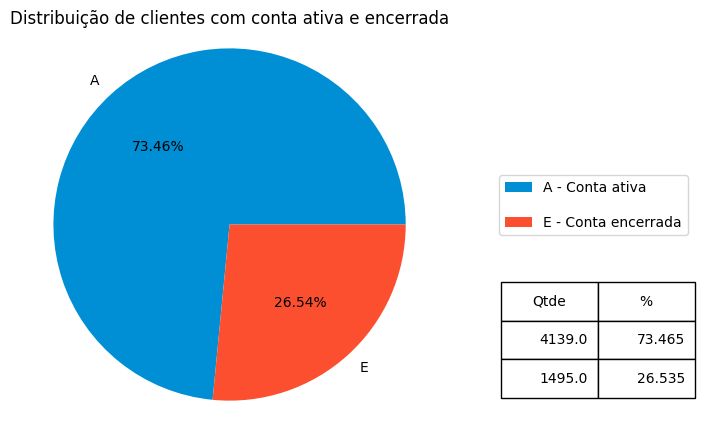

In [50]:
df_exited = base_churn_raw4['Churn'].value_counts()
df_exited = pd.DataFrame(df_exited)
df_exited['%'] = df_exited['count'] / df_exited['count'].sum() * 100

plt.figure(figsize=(5, 5))

plt.pie(df_exited['%'], labels=['A', 'E'], colors=[
        '#008fd5', '#fc4f30'], autopct='%0.2f%%')
plt.legend(loc='right', labels=['A - Conta ativa', 'E - Conta encerrada'],
           labelspacing=1.5, bbox_to_anchor=(1.1, 0.1, 0.6, 0.9))
plt.title('Distribuição de clientes com conta ativa e encerrada')

cell_text = []
for row in range(len(df_exited)):
    cell_text.append(df_exited.iloc[row])
table = plt.table(cellText=cell_text, colLabels=['Qtde', '%'],
                  loc='bottom right', bbox=(1.2, 0.05, 0.5, 0.3))
table.auto_set_font_size(False)
table.set_fontsize(10)
for cell in table._cells:
    if cell == (2, 1) or cell == (1, 1):
        cell_text = table._cells[cell].get_text().get_text()
        table._cells[cell].get_text().set_text(f'{float(cell_text):.3f}')
plt.axis('equal')
plt.show()

* INSIGHT


	Embora seja comum clientes cancelarem suas contas de serviços de comunicação, o atual percentual de **26,54%** de perda de clientes (_1495 contas_) é um índice muito alto, observando o gráfico está acima de 1/4 do total de contas que a empresa já administrou.

##### 4.1.2 - Variável Númerica

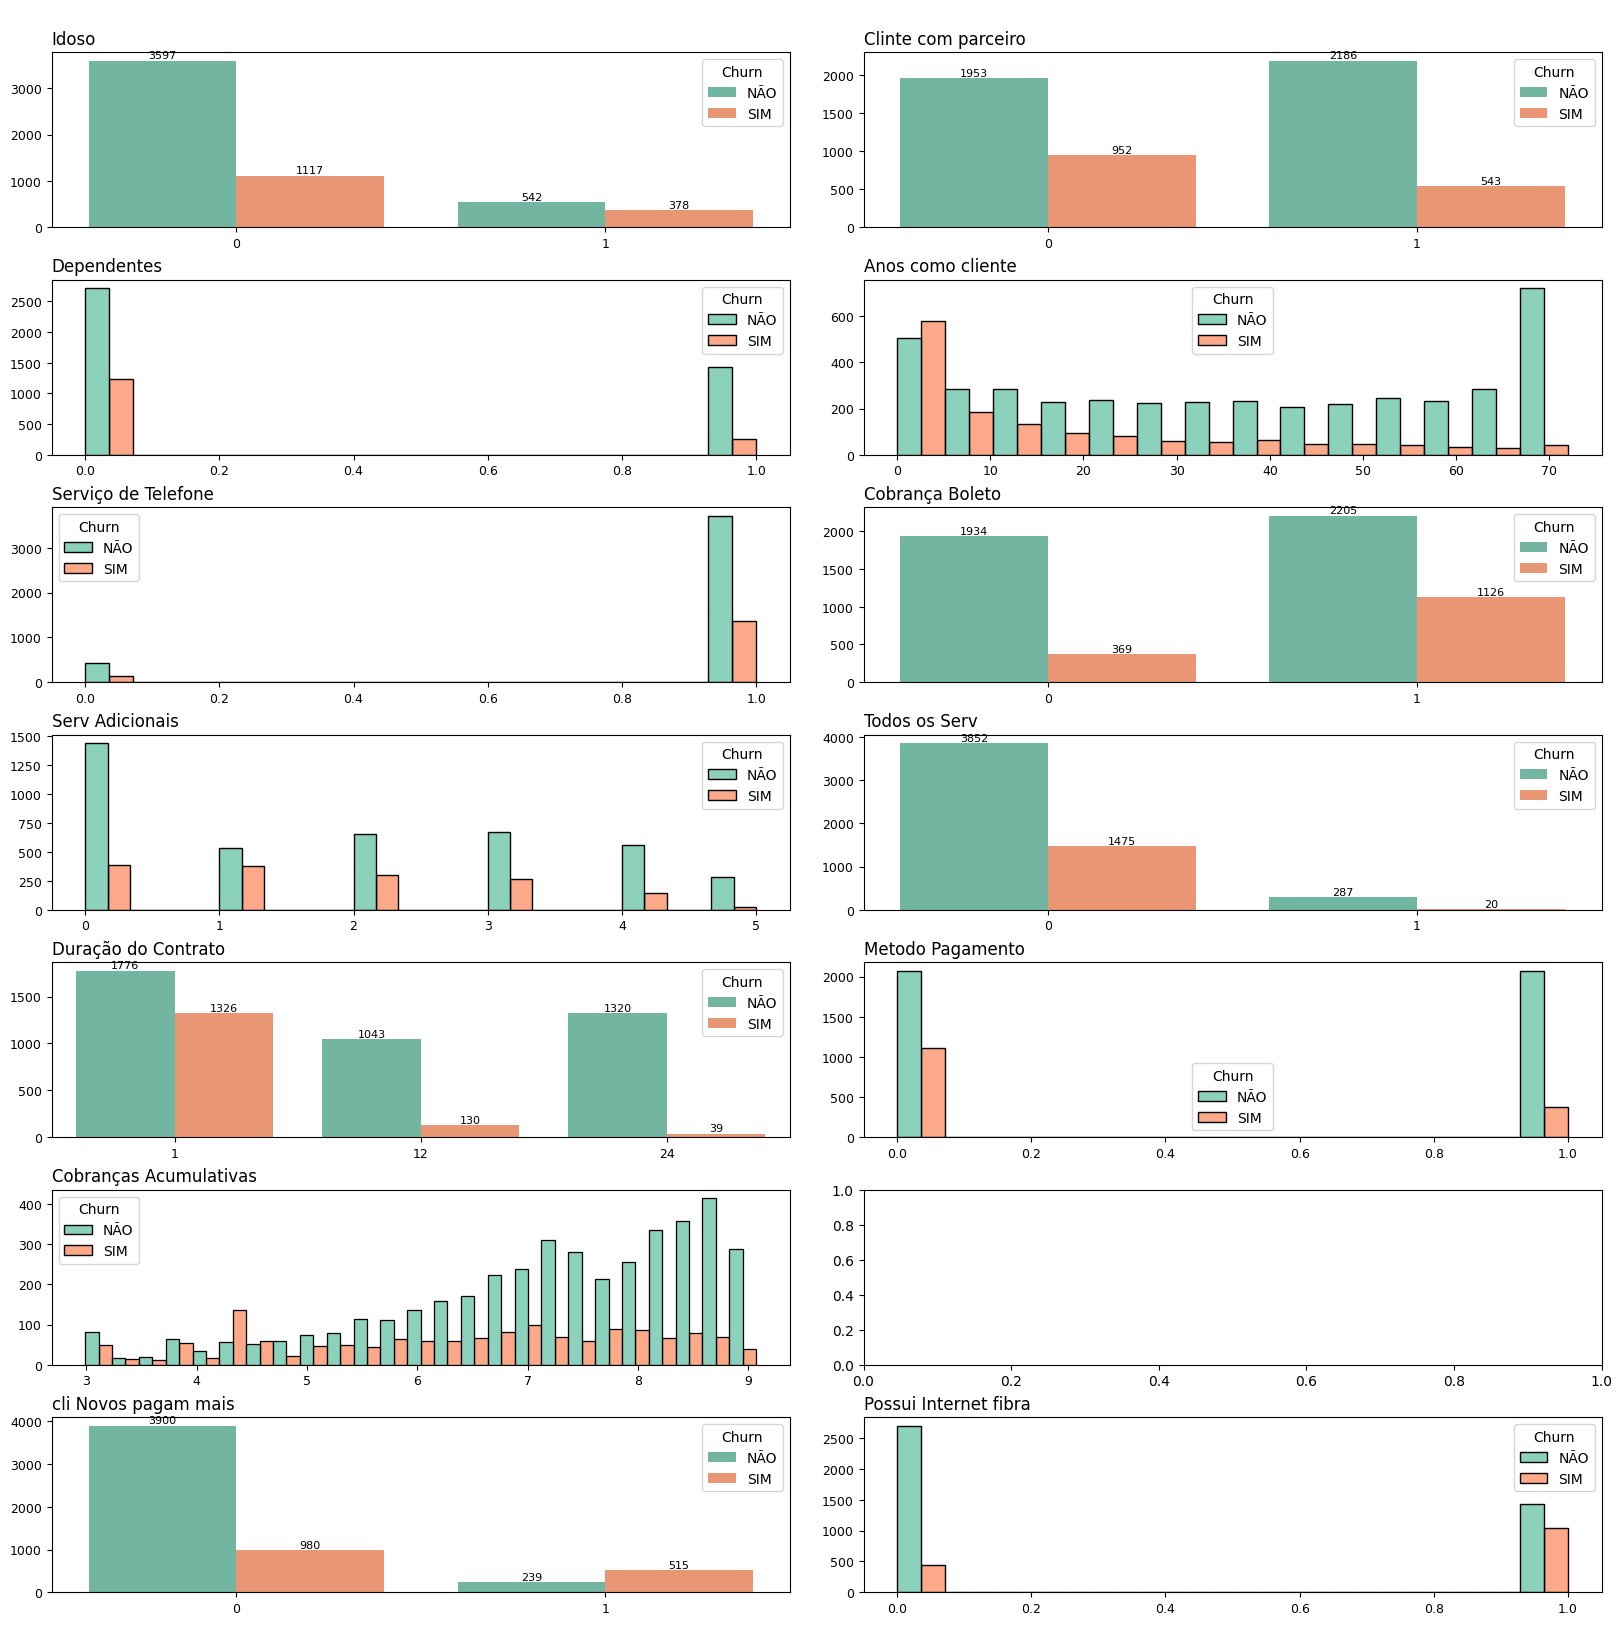

In [60]:
# Funções para gerar gráficos histplot e countplot

saida = base_churn_raw4['Churn'].replace({0: 'NÃO', 1: 'SIM'})
hue_order = ['NÃO', 'SIM']

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6),
      (ax7, ax8), (ax9, ax10), (ax11, ax12), (ax13, ax14)) = plt.subplots(7, 2, figsize=(20, 20))


graf_countplot(base_churn_raw4, 'Cli_Idoso', '\nIdoso', ax1)
graf_countplot(base_churn_raw4, 'Parceiro', '\nClinte com parceiro', ax2)
graf_histplot(base_churn_raw4, 'Dependents', '\nDependentes', ax3)
graf_histplot(base_churn_raw4, 'Fidelidade', '\nAnos como cliente', ax4)
graf_histplot(base_churn_raw4, 'PhoneService', '\nServiço de Telefone', ax5)
graf_countplot(base_churn_raw4, 'CobrancaPapel', '\nCobrança Boleto', ax6)
graf_histplot(base_churn_raw4, 'QtdServicosAdicionais', '\nServ Adicionais', ax7)
graf_countplot(base_churn_raw4, 'UsaTodosServicos', '\nTodos os Serv', ax8)
graf_countplot(base_churn_raw4, 'DuracaoContrato', '\nDuração do Contrato', ax9)
graf_histplot(base_churn_raw4, 'MetodoPagamentoAutomatizado', '\nMetodo Pagamento', ax10)
graf_histplot(base_churn_raw4, 'LogCobrancaCumulativa', '\nCobranças Acumulativas', ax11)
""" graf_countplot(base_churn_raw4, 'CustoMensalRelativo', '\nRelaçao de custo', ax12) """
graf_countplot(base_churn_raw4, 'NovoClienteCustoAlto', '\ncli Novos pagam mais', ax13)
graf_histplot(base_churn_raw4, 'ServicoInternetFibra', '\nPossui Internet fibra', ax14)


plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()
